**We have shark attack dataset, which contain 25723 rows and 24 columns. We need to predict fatality of shark's attack.**


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler24

In [3]:
df = pd.read_csv(r"C:\Users\Tetiana\Documents\ironhack\lab\Shark_attack_dataset\archive\attacks.csv", encoding='latin1')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
df.shape

(25723, 24)

In [6]:
df.columns


Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

**For our analysis we decided to use next columns which are more important for prediction:**
 - 'year'(numerical),
 - 'type'(categorical),
 - 'country'(categorical),
 - 'activity'(categorical),
 - 'sex'(categorical),
 - 'injury'(categorical),
 - 'fatal_(y/n)'(categorical),
 - 'new_species'(categorical),
 - 'standardized_age' (numerical),
 - 'new_time'(categorical).

**Let's take a look to the data.**
1.Representation of fatal column

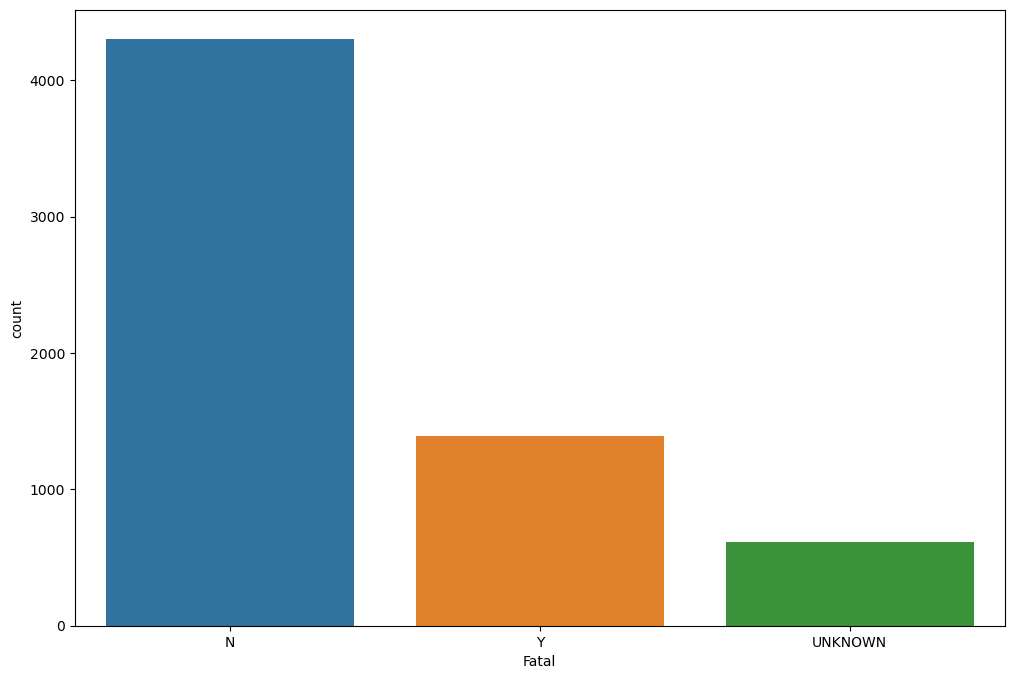

2. Number of shark attacks per country

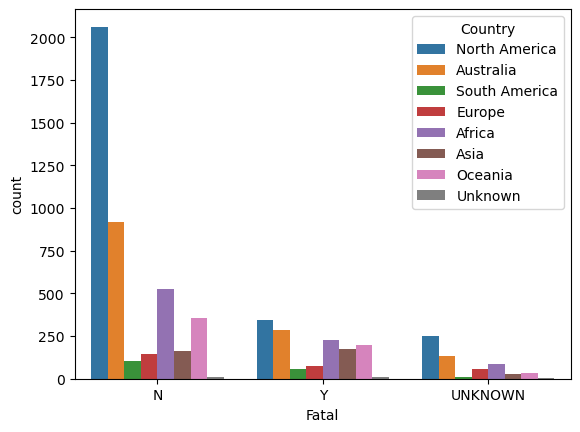

3.Amount of shark attack related to the type

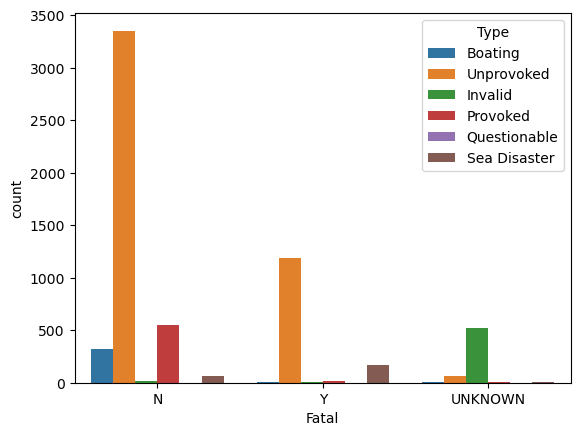

4. Amount of shark attack related to the shark species.

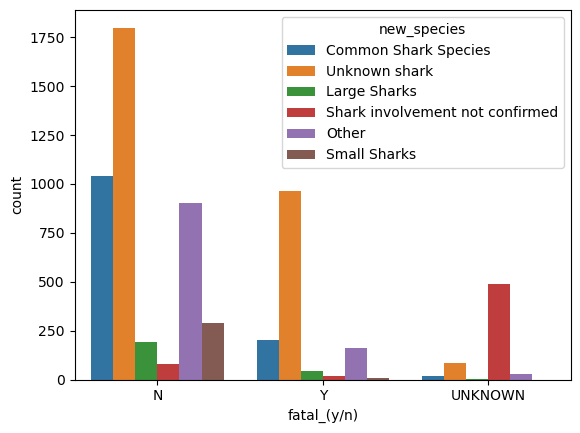

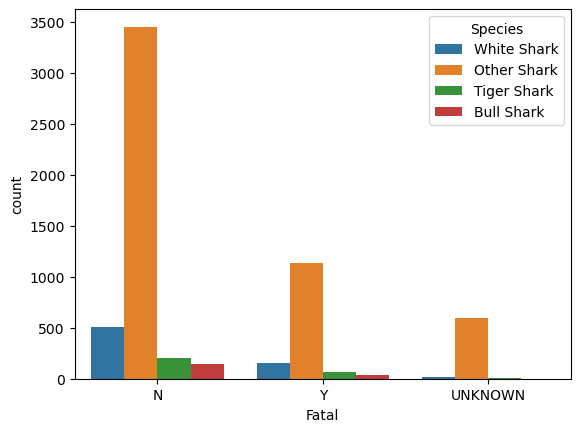

5.Amount of shark attack related to the type of injury 

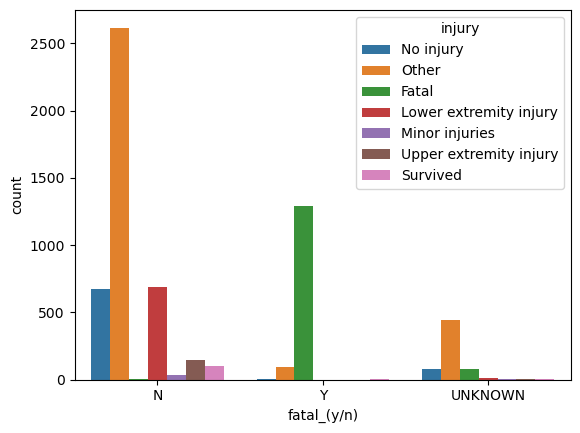

6.Amount of shark attack related to the type of activity

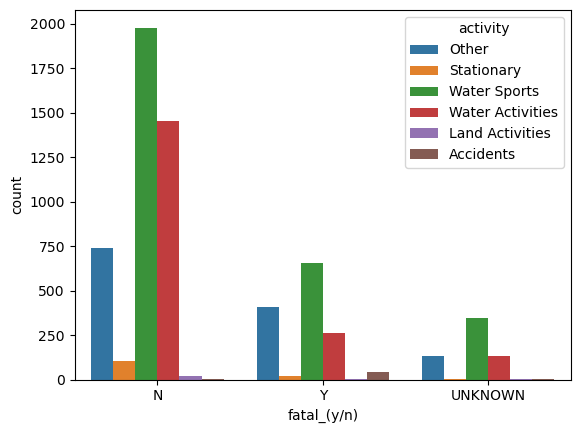

7.Years with the highest number of shark attack cases

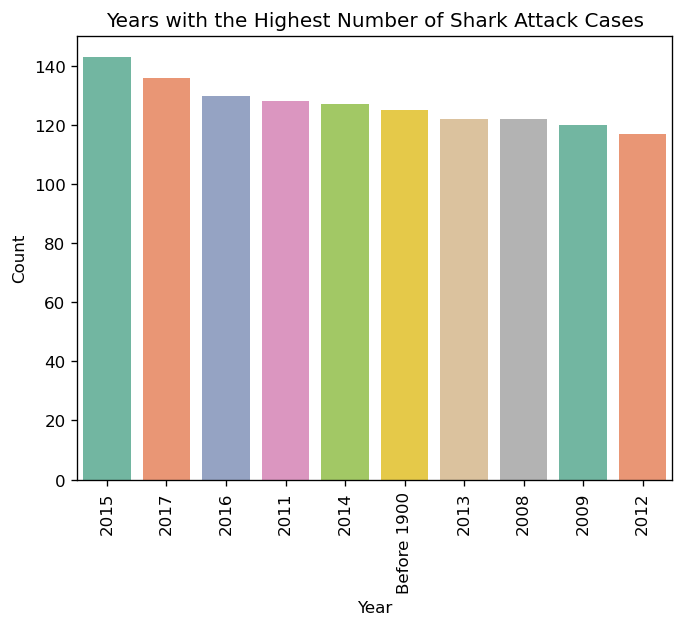

We've done logistical regression analysis and got this result:

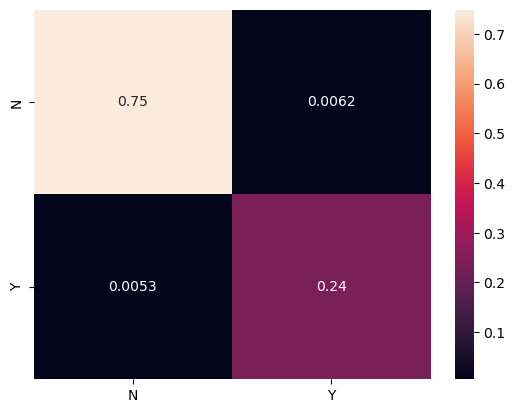

Classification.score - 0.9885764499121266. But our data was imbalanced (fatal_(y/n) - N: 859, Y: 279), so it's so it is guessing most as 'N'. Because of it me used RandomOverSampler to balance our data and got the rundom sample. Final prediction:

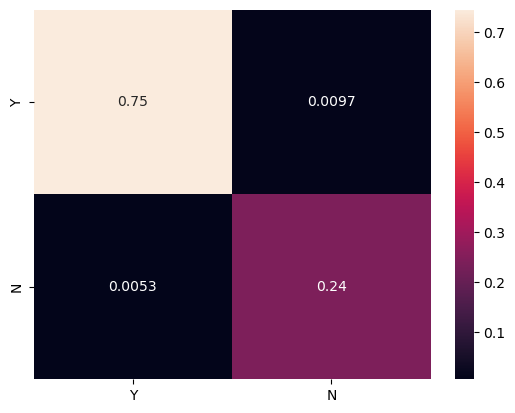


- **True Positive (TP): 0.75**
  - This indicates that our model correctly predicted 75% of the fatal shark attacks (instances where the model predicted "Yes" and it was actually fatal).
  
- **True Negative (TN): 0.24**
  - This suggests that the model correctly identified 24% of the non-fatal shark attacks (instances where the model predicted "No" and it was actually not fatal).

- **False Positive (FP): 0.0053**
  - This represents a small proportion (0.53%) of instances where the model predicted a fatal attack, but it was actually non-fatal. False positives are Type I errors.

- **False Negative (FN): 0.0097**
  - This indicates that 0.97% of the time, the model predicted a non-fatal attack when it was actually fatal. False negatives are Type II errors.

Let's analyze these results:

- The model performs reasonably well in identifying fatal shark attacks with a higher true positive rate (75%). However, there is room for improvement in correctly predicting non-fatal attacks (24% true negative rate).
- The false positive and false negative rates are relatively low, indicating that the model's misclassification rates for both classes are reasonably small but not negligible.
- The model seems to be more sensitive in predicting fatal attacks (higher true positive rate) compared to non-fatal attacks (lower true negative rate).

Considering these results, further refinement or adjustment of the model might be necessary to improve its predictive accuracy, especially in correctly identifying non-fatal shark attacks. 